# Map of correlations

In [68]:
import xarray as xr
from pathlib import Path

import intake
import matplotlib.pyplot as plt
import easygems.healpix as egh
import cartopy.crs as ccrs

import numpy as np
import pandas as pd
import os

In [4]:

# define paths
datapath = '/g/data/qx55/germany_node/d3hp003.zarr'
file = 'P1D'
zoom = 'z5'

# define the fname
fpath = f'{datapath}/{file}_mean_{zoom}_atm.zarr'

# open the zarr file
ds = xr.open_zarr(fpath)

# what variables are there in the dataset?
for key, longname in ds.data_vars.items():
    print(f'{key}: {longname.long_name}')

ds_jja = ds.sel(time=ds['time'].dt.month.isin([6, 7, 8]))

clivi: cloud ice path
clt: total cloud cover
clwvi: cloud condensed water path
egpvi: Atmosphere Geopotential Energy Content
einvi: Atmosphere Moist Internal Energy Content
ekhvi: Atmosphere Horizontal Kinetic Energy Content
ekvvi: Atmosphere Vertical Kinetic Energy Content
hflsd: latent heat flux
hfssd: sensible heat flux
hur: relative humidity
hus: Specific humidity
huss: specific humidity in 2m
mrso: Water content of soil layers
o3vi: ozone path
orog: surface altitude
pr: precipitation flux
prs: large-scale precipitation flux (snow)
prw: water vapor path
ps: surface pressure
psl: mean sea level pressure
qall: mass fraction of all hydrometeors in air
rlds: surface downwelling longwave radiation
rldscs: surface downwelling clear-sky longwave radiation
rlus: surface upwelling longwave radiation
rlut: toa outgoing longwave radiation
rlutcs: toa outgoing clear-sky longwave radiation
rsds: surface downwelling shortwave radiation
rsdscs: surface downwelling clear-sky shortwave radiation
rs

In [5]:
#calculate evapotranspiration 
icon_evap = (ds_jja['hflsd']*86400 )/2.45e6

In [6]:
icon_pr = ds['pr'].mean('time')* 86400

In [7]:
icon_y1  = xr.where( (icon_pr>=.1)&(ds_jja['sftlf']>0.1), icon_evap, np.NaN)

icon_corr_evap_pr      = xr.where((icon_pr>=.1)&( ds_jja['sftlf'] >0.1), 
                                xr.corr(ds_jja['pr'], icon_y1, dim='time'), np.NaN) #.values

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


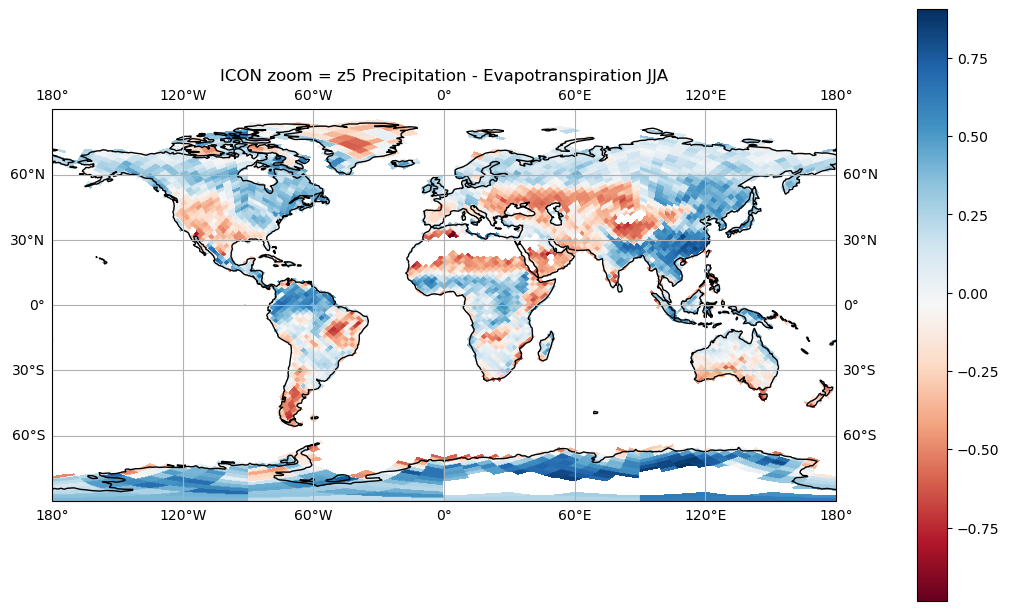

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [8]:
# correlation map of precipitation and evapotranspiration

plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(icon_corr_evap_pr.values,ax=ax,cmap='RdBu')
ax.set_title(f'ICON zoom = {zoom} Precipitation - Evapotranspiration JJA')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()

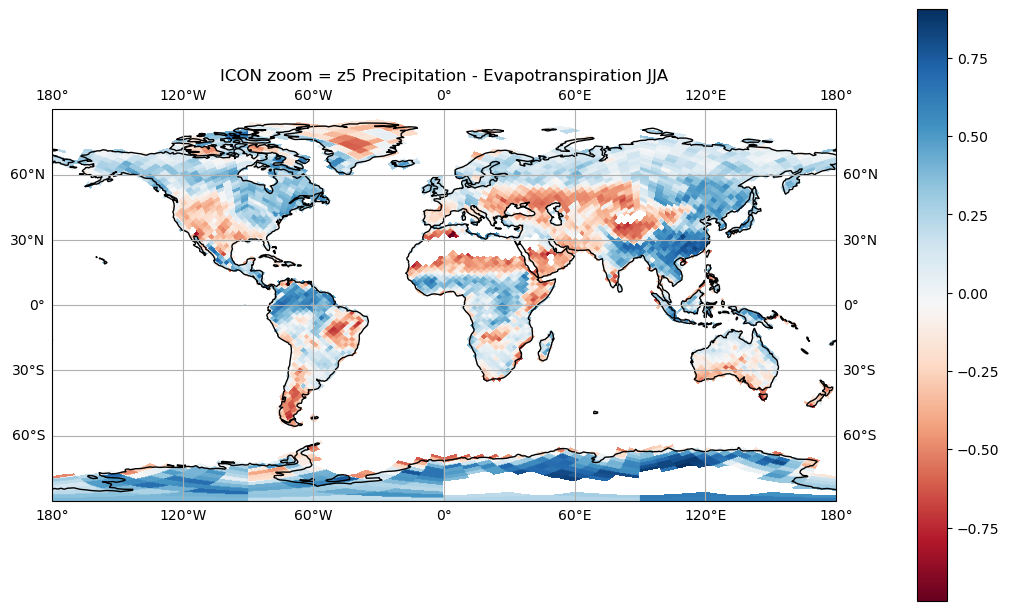

In [9]:
# latent heat

icon_y1  = xr.where( (icon_pr>=.1)&(ds_jja['sftlf']>0.1), ds['hflsd'], np.NaN)

icon_corr_lh_pr      = xr.where((icon_pr>=.1)&( ds_jja['sftlf'] >0.1), 
                                xr.corr(ds_jja['pr'], icon_y1, dim='time'), np.NaN) #.values
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(icon_corr_lh_pr.values,ax=ax,cmap='RdBu')
ax.set_title(f'ICON zoom = {zoom} Precipitation - Evapotranspiration JJA')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()